In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
from sklearn import decomposition as dcp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing

# 1. Correlation matrix

/var/folders/cw/n2nls3ts67q_tsjfyl0q_vtr0000gn/T/ipykernel_6065/2417670613.py:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matrix, dtype=np.bool))


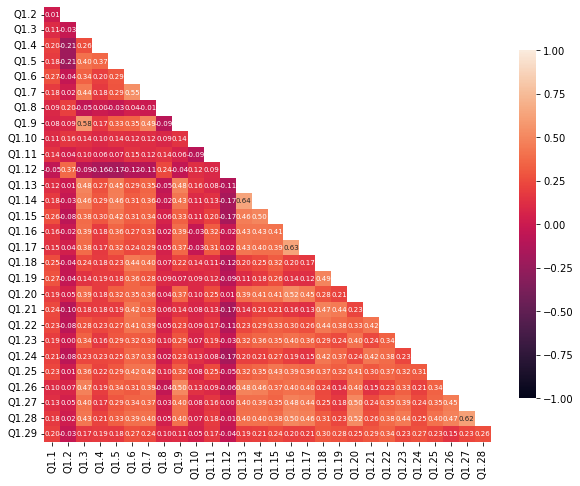

In [2]:
Boats_Data = pd.read_csv('Data_boats.csv')

Boats_Q1 = Boats_Data.iloc[:, 1:30]

# print("Dataframe is : ")

# print(Boats_Q1)

matrix = Boats_Q1.corr()

# print("Correlation matrix is : ")

# print(matrix)

fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(matrix, dtype=np.bool))

mask = mask[1:, :-1]
corr = matrix.iloc[1:, :-1].copy()
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", vmin=-1,
           vmax=1, cbar_kws={"shrink": .8}, annot_kws={"size": 7})
plt.yticks(rotation=0)
plt.show()


In [3]:
sorted_matrix = matrix.unstack().sort_values(ascending=False).drop_duplicates()
sorted_matrix = pd.DataFrame(sorted_matrix)
sorted_matrix.head(15)


0
Q1.1  Q1.1   1.000000
Q1.13 Q1.14  0.638152
Q1.17 Q1.16  0.631432
Q1.28 Q1.27  0.615321
Q1.3  Q1.9   0.578913
Q1.7  Q1.6   0.545971
Q1.16 Q1.20  0.521553
Q1.20 Q1.28  0.520289
      Q1.27  0.503294
Q1.9  Q1.26  0.502678
Q1.15 Q1.14  0.499926
Q1.16 Q1.28  0.496418
Q1.9  Q1.7   0.490799
Q1.19 Q1.18  0.487302
Q1.3  Q1.13  0.484510

### We can see from the correlation matrix that there are a significant number of attitudinal pairs with high correlations.
### These correlations imply that some of the attitudinal questions asked to the customers are basically the same. for example, `Q1.13` and `Q1.14` which have a high correlation means that if a customer strongly agrees with one question is mostly to do the same with the other.


In [4]:
filteredDf = matrix[((matrix >= .5) | (matrix <= -.5)) & (matrix != 1.000)]
filteredDf


Q1.1  Q1.2      Q1.3  Q1.4  Q1.5      Q1.6      Q1.7  Q1.8      Q1.9  \
Q1.1    NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.2    NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.3    NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN  0.578913   
Q1.4    NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.5    NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.6    NaN   NaN       NaN   NaN   NaN       NaN  0.545971   NaN       NaN   
Q1.7    NaN   NaN       NaN   NaN   NaN  0.545971       NaN   NaN       NaN   
Q1.8    NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.9    NaN   NaN  0.578913   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.10   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.11   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.12   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.13   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.14   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.15   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.16   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.17   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.18   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.19   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.20   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.21   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.22   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.23   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.24   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.25   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.26   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN  0.502678   
Q1.27   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.28   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   
Q1.29   NaN   NaN       NaN   NaN   NaN       NaN       NaN   NaN       NaN   

       Q1.10  ...     Q1.20  Q1.21  Q1.22  Q1.23  Q1.24  Q1.25     Q1.26  \
Q1.1     NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.2     NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.3     NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.4     NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.5     NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.6     NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.7     NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.8     NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.9     NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN  0.502678   
Q1.10    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.11    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.12    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.13    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.14    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.15    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.16    NaN  ...  0.521553    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.17    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.18    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.19    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.20    NaN  ...       NaN    NaN    NaN    NaN    NaN    NaN       NaN   
Q1.21    NaN  ...       NaN    NaN    Na

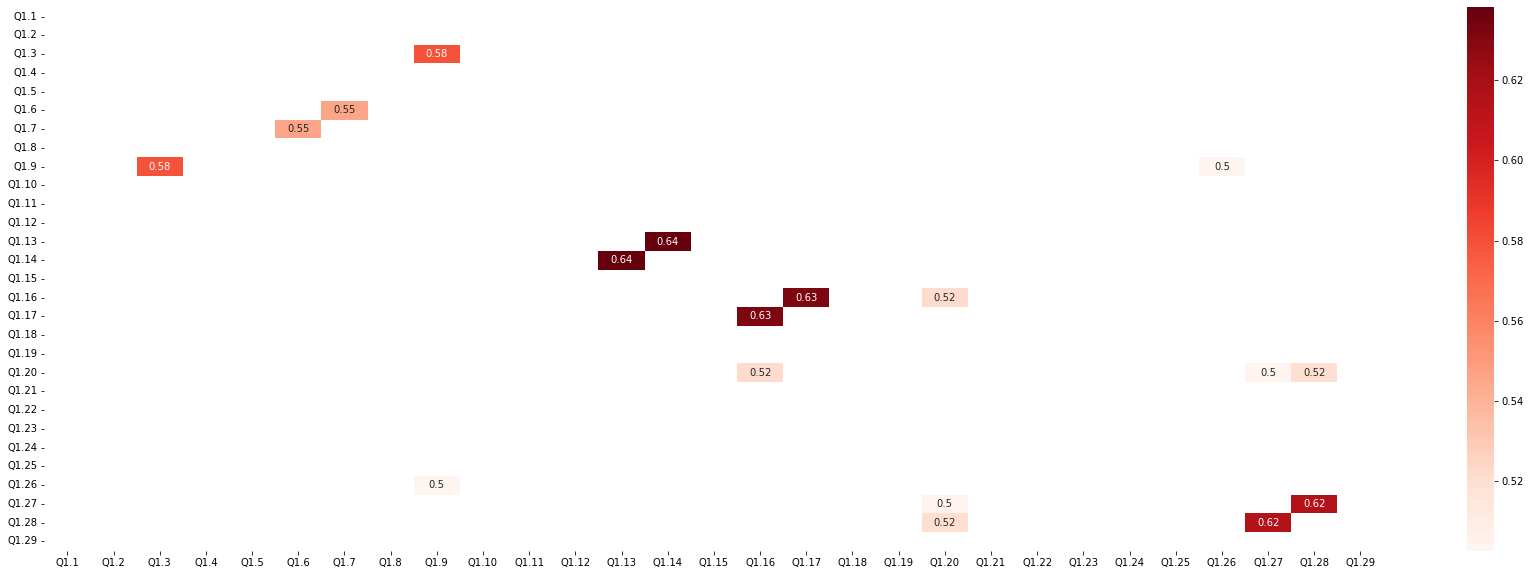

In [5]:
filteredDf = matrix[((matrix >= .5) | (matrix <= -.5)) & (matrix != 1.000)]
plt.figure(figsize=(30, 10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()


# 2. PCA

In this part we will try to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation using the PCA method. 

### Data import & components creation

In [6]:
# We will do so to cluster the similar data points based on the feature correlation between them in the next parts. 

In [7]:
boat = pd.read_csv(r'Data_boats.csv')
boat.head()

RESPID  Q1.1  Q1.2  Q1.3  Q1.4  Q1.5  Q1.6  Q1.7  Q1.8  Q1.9  ...  Q16.20  \
0   23822     5     1     5     5     5     5     5     3     5  ...       4   
1  224795     3     2     4     4     4     4     5     3     4  ...       4   
2   20952     3     1     4     4     5     4     4     2     4  ...       5   
3    5612     5     2     3     4     5     5     3     3     3  ...       4   
4   15016     4     2     4     5     5     4     5     4     5  ...       4   

   Q16.21  Q16.22  Q16.23  Q16.24  Q16.25  Q16.26  Q16.27  Q17  Q18  
0       4       4       4       5       4       4       4    0    1  
1       3       3       4       3       3       3       3    1    1  
2       3       3       5       2       4       3       5    1    0  
3       4       4       4       2       5       5       4    1    0  
4       4       5       5       3       4       5       4    0    0  

[5 rows x 82 columns]

In [8]:
print(boat.shape)

(2813, 82)


In [9]:
new_boat = boat[['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6', 'Q1.7', 'Q1.8', 'Q1.9', 'Q1.10', 'Q1.11', 'Q1.12', 'Q1.13', 'Q1.14', 'Q1.15', 'Q1.16', 'Q1.17', 'Q1.18', 'Q1.19', 'Q1.20', 'Q1.21', 'Q1.22', 'Q1.23', 'Q1.24', 'Q1.25', 'Q1.26', 'Q1.27', 'Q1.28', 'Q1.29']]

In [10]:
new_boat=pd.DataFrame(preprocessing.scale(new_boat), columns=new_boat.columns)
new_boat.head()

Q1.1      Q1.2      Q1.3      Q1.4      Q1.5      Q1.6      Q1.7  \
0  1.186104 -1.861074  1.846000  1.353462  1.560841  1.268743  1.477733   
1 -1.254650 -0.874417  0.866411  0.133568  0.482588  0.055219  1.477733   
2 -1.254650 -1.861074  0.866411  0.133568  1.560841  0.055219  0.362994   
3  1.186104 -0.874417 -0.113177  0.133568  1.560841  1.268743 -0.751746   
4 -0.034273 -0.874417  0.866411  1.353462  1.560841  0.055219  1.477733   

       Q1.8      Q1.9     Q1.10  ...     Q1.20     Q1.21     Q1.22     Q1.23  \
0 -0.903108  1.964225  0.679611  ...  0.869481  1.032227  1.340882  1.403761   
1 -0.903108  1.034968  0.679611  ... -0.162523 -0.343261 -0.012509 -0.550597   
2 -2.128008  1.034968 -0.393800  ... -0.162523 -1.718749  1.340882  0.426582   
3 -0.903108  0.105710  0.679611  ... -0.162523  1.032227 -0.012509  1.403761   
4  0.321792  1.964225  0.679611  ...  0.869481 -0.343261 -0.012509  1.403761   

      Q1.24     Q1.25     Q1.26     Q1.27     Q1.28     Q1.29  
0  1.175582  1.325295  1.955336 -0.148794  0.703498  1.326973  
1 -0.143489  0.229131  1.003057  0.804640  0.703498 -0.041346  
2 -0.143489  0.229131  1.955336 -0.148794 -0.314475 -0.041346  
3 -1.462561  1.325295  1.003057 -0.148794 -0.314475  1.326973  
4 -0.143489  0.229131  1.955336  0.804640  0.703498 -0.041346  

[5 rows x 29 columns]

In [11]:
new_boat.isna().sum()

Q1.1     0
Q1.2     0
Q1.3     0
Q1.4     0
Q1.5     0
Q1.6     0
Q1.7     0
Q1.8     0
Q1.9     0
Q1.10    0
Q1.11    0
Q1.12    0
Q1.13    0
Q1.14    0
Q1.15    0
Q1.16    0
Q1.17    0
Q1.18    0
Q1.19    0
Q1.20    0
Q1.21    0
Q1.22    0
Q1.23    0
Q1.24    0
Q1.25    0
Q1.26    0
Q1.27    0
Q1.28    0
Q1.29    0
dtype: int64

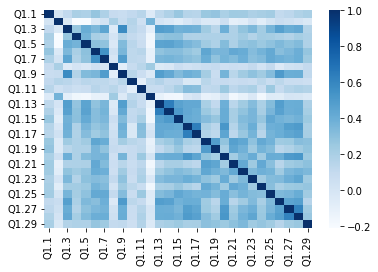

In [12]:
#Covariance matrix
ax=sns.heatmap(new_boat.cov(), linewidth=0, cmap='Blues')
plt.show()


In [13]:
pca=dcp.PCA(n_components=29) 
pca.fit(new_boat)

PCA(n_components=29)

In [14]:
pca.explained_variance_ratio_


array([0.29077888, 0.08046933, 0.06423316, 0.0502622 , 0.04163343,
       0.03097634, 0.02816456, 0.0271151 , 0.02691192, 0.02556287,
       0.02367698, 0.02253896, 0.02234277, 0.02130956, 0.0210026 ,
       0.01987863, 0.01936878, 0.01850035, 0.01807308, 0.01762793,
       0.01722417, 0.01686337, 0.01588518, 0.01572292, 0.01420314,
       0.01322806, 0.01275853, 0.01215256, 0.01153463])

In [15]:
explained_variance_ratio_cumul_sum=np.cumsum(pca.explained_variance_ratio_) #compute the cumulative sum
explained_variance_ratio_cumul_sum

array([0.29077888, 0.37124821, 0.43548137, 0.48574357, 0.527377  ,
       0.55835334, 0.58651791, 0.61363301, 0.64054493, 0.66610779,
       0.68978478, 0.71232373, 0.7346665 , 0.75597607, 0.77697866,
       0.79685729, 0.81622607, 0.83472642, 0.8527995 , 0.87042744,
       0.88765161, 0.90451498, 0.92040016, 0.93612308, 0.95032622,
       0.96355428, 0.9763128 , 0.98846537, 1.        ])

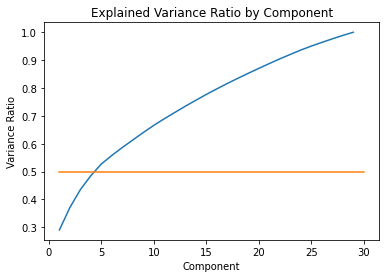

In [16]:
plt.title("Explained Variance Ratio by Component")
plt.plot(np.arange(1,30),explained_variance_ratio_cumul_sum) #so that the first component is at 1, not 0
plt.plot([1,30],[0.5,0.5])
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

In [17]:
# Based on the 50% rule of thumb, we will pick 5 components. If we had gone with 80%, we would pick 15. 

### Covariance of the "new" features 

In [18]:
pca.explained_variance_

array([8.43558634, 2.33444042, 1.86342403, 1.45812211, 1.2077989 ,
       0.89863346, 0.81706273, 0.78661768, 0.78072314, 0.74158672,
       0.68687666, 0.65386221, 0.64817081, 0.61819708, 0.60929186,
       0.5766852 , 0.56189441, 0.53670094, 0.5243058 , 0.51139182,
       0.49967867, 0.48921177, 0.46083393, 0.45612688, 0.41203744,
       0.38375006, 0.37012892, 0.35254961, 0.33462333])

In [19]:
pca.explained_variance_ratio_.sum()

1.0

In [20]:
# A large drop between 1 and 2. Again a drop at 5. A drop at 15 too ? So we pick 5? 
# Marginal addition also seems to become smaller after 5

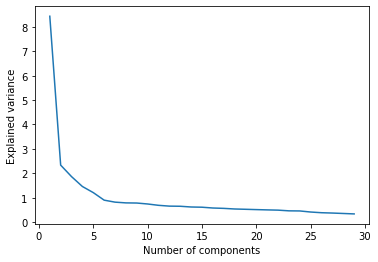

In [21]:
plt.plot(np.arange(1,30),pca.explained_variance_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

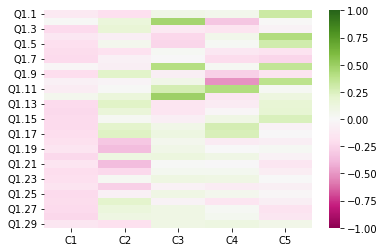

In [22]:
loadings=pd.DataFrame(pca.components_[0:5,:].T).set_index(np.arange(1,30))
loadings.columns = ['C1','C2', 'C3', 'C4', 'C5']
loadings.index = new_boat.columns
loadings

ax=sns.heatmap(loadings, linewidth=0, cmap='PiYG', vmin=-1,vmax=1)
plt.show()


### Sparse PCA

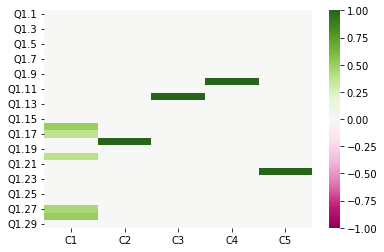

In [23]:
pca_sparse=dcp.SparsePCA(alpha=30,n_components=5)
pca_sparse.fit(new_boat)
loadings_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,30))
loadings_sparse.columns = ['C1','C2', 'C3', 'C4', 'C5']
loadings_sparse.index = new_boat.columns

ax=sns.heatmap(loadings_sparse, linewidth=0, cmap='PiYG', vmin=-1,vmax=1)
plt.show()

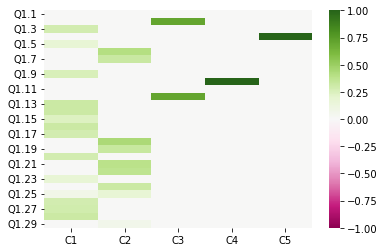

In [24]:
pca_sparse=dcp.SparsePCA(alpha=20,n_components=5)
pca_sparse.fit(new_boat)
loadings_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,30))
loadings_sparse.columns = ['C1','C2', 'C3', 'C4', 'C5']
loadings_sparse.index = new_boat.columns

ax=sns.heatmap(loadings_sparse, linewidth=0, cmap='PiYG', vmin=-1,vmax=1)
plt.show()

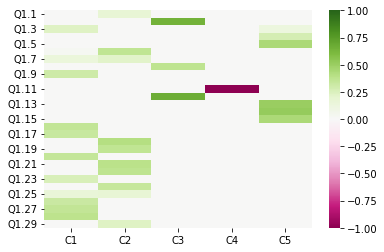

In [25]:
pca_sparse=dcp.SparsePCA(alpha=10,n_components=5)
pca_sparse.fit(new_boat)
loadings_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,30))
loadings_sparse.columns = ['C1','C2', 'C3', 'C4', 'C5']
loadings_sparse.index = new_boat.columns

ax=sns.heatmap(loadings_sparse, linewidth=0, cmap='PiYG', vmin=-1,vmax=1)
plt.show()

In [26]:
print("""
\033[1mTop five questions in the component\033[0m

\033[1mC1 - Boat enthusiasts\033[0m
---> 'passion', consult others, spend all their spare time on boat
{}        

\033[1mC2 - Sport and social activities\033[0m
---> ('adventure', 'stay active', 'nature', 'socialise', 'reward')
{}

\033[1mC3 - Non-fancy boats\033[0m
---> ('basic boat', prefer price over brand & function, functionality over style)
{}

\033[1mC4 - No self-repairs\033[0m 
{}

\033[1mC5 - Premium boats\033[0m      
---> ('brand is key', 'willing to pay a premium for the brand', 'need latest, greatest 
boat & equiment')
{}
""".format(loadings_sparse['C1'][loadings_sparse['C1'] != 0].sort_values().tail(6),
           loadings_sparse['C2'][loadings_sparse['C2'] != 0].sort_values().tail(6),
           loadings_sparse['C3'][loadings_sparse['C3'] != 0].sort_values().tail(6),
           loadings_sparse['C4'][loadings_sparse['C4'] != 0].sort_values().tail(6),
           loadings_sparse['C5'][loadings_sparse['C5'] != 0].sort_values().tail(6),
))



Top five questions in the component

C1 - Boat enthusiasts
---> 'passion', consult others, spend all their spare time on boat
Q1.26    0.324141
Q1.17    0.333530
Q1.20    0.343773
Q1.27    0.356870
Q1.16    0.358772
Q1.28    0.375134
Name: C1, dtype: float64        

C2 - Sport and social activities
---> ('adventure', 'stay active', 'nature', 'socialise', 'reward')
Q1.24    0.343584
Q1.6     0.359754
Q1.19    0.363691
Q1.22    0.370700
Q1.21    0.388960
Q1.18    0.412958
Name: C2, dtype: float64

C3 - Non-fancy boats
---> ('basic boat', prefer price over brand & function, functionality over style)
Q1.8     0.371465
Q1.2     0.642214
Q1.12    0.670503
Name: C3, dtype: float64

C4 - No self-repairs 
Q1.11   -1.0
Name: C4, dtype: float64

C5 - Premium boats      
---> ('brand is key', 'willing to pay a premium for the brand', 'need latest, greatest 
boat & equiment')
Q1.3     0.128841
Q1.4     0.275110
Q1.15    0.440939
Q1.5     0.442014
Q1.13    0.501043
Q1.14    0.516591
Name: C5, dtyp

We have decided to move forward with 5 principal components as they are able to capture (hold) most of the variance (information) of our data.

As seen in part 1, the 29 original components are correlated to one another. However, we achieve uncorrelated principal components, thereby reducing the original data features.

### The components can be interpreted as follows:

1. C1 - Boat enthusiasts
- 'passion'
- consult others
- spend all their spare time on boat
       

2. C2 - Sport and social activities
- 'adventure'
- 'stay active'
- 'nature'
- 'socialise'
- 'reward'


3. C3 - Non-fancy boats
- 'basic boat'
- prefer price over brand & function
- prefer functionality over style


4. C4 - No self-repairs 


5. C5 - Premium boats      
- 'brand is key'
- 'willing to pay a premium for the brand'
- 'need latest, greatest boat & equiment'


### Interpretation

The first five components are able to explain most of the attitudes and beliefs of the 3000 participants about the boating market in the US which we can use to segment our customers.

### Transform accordingly & save as a CSV file

In [27]:
data_pca = pca.fit_transform(new_boat)

data_pca = pca_sparse.fit_transform(new_boat)
column_names = ["C"+str(i+1) for i in range(data_pca.shape[1])]

final_boat=pd.DataFrame(data_pca, columns=column_names)
final_boat

C1        C2        C3        C4        C5
0     3.254064  3.453319 -2.734423  1.256728  3.783728
1     1.302327  0.258312 -1.450201  0.396797  1.880733
2     1.677207 -0.587510 -2.528075  1.256728  3.373546
3     0.697139  1.260505 -1.450201 -0.463134  3.277835
4     4.039378  0.778438 -1.656549 -1.323065  3.108680
...        ...       ...       ...       ...       ...
2808  2.647546  2.099288 -3.184925  0.396797 -0.175881
2809 -4.143445 -9.676651 -2.321727 -1.323065 -5.671344
2810  0.577662 -3.093350  0.490870 -0.463134 -0.052909
2811  0.194216 -2.572384  0.314001 -0.463134  0.919377
2812 -2.241971 -3.455093  3.303468  2.116659 -4.906853

[2813 rows x 5 columns]

In [28]:
first_column = boat.pop('RESPID')
final_boat.insert(0,'RESPID', first_column)

In [29]:
final_boat

RESPID        C1        C2        C3        C4        C5
0      23822  3.254064  3.453319 -2.734423  1.256728  3.783728
1     224795  1.302327  0.258312 -1.450201  0.396797  1.880733
2      20952  1.677207 -0.587510 -2.528075  1.256728  3.373546
3       5612  0.697139  1.260505 -1.450201 -0.463134  3.277835
4      15016  4.039378  0.778438 -1.656549 -1.323065  3.108680
...      ...       ...       ...       ...       ...       ...
2808  485225  2.647546  2.099288 -3.184925  0.396797 -0.175881
2809  484245 -4.143445 -9.676651 -2.321727 -1.323065 -5.671344
2810  224990  0.577662 -3.093350  0.490870 -0.463134 -0.052909
2811   17590  0.194216 -2.572384  0.314001 -0.463134  0.919377
2812    8241 -2.241971 -3.455093  3.303468  2.116659 -4.906853

[2813 rows x 6 columns]

In [30]:
final_boat.to_csv('finalboat.csv',index=False)

In [31]:
new_boat

Q1.1      Q1.2      Q1.3      Q1.4      Q1.5      Q1.6      Q1.7  \
0     1.186104 -1.861074  1.846000  1.353462  1.560841  1.268743  1.477733   
1    -1.254650 -0.874417  0.866411  0.133568  0.482588  0.055219  1.477733   
2    -1.254650 -1.861074  0.866411  0.133568  1.560841  0.055219  0.362994   
3     1.186104 -0.874417 -0.113177  0.133568  1.560841  1.268743 -0.751746   
4    -0.034273 -0.874417  0.866411  1.353462  1.560841  0.055219  1.477733   
...        ...       ...       ...       ...       ...       ...       ...   
2808  1.186104 -1.861074  1.846000  1.353462  1.560841  1.268743  1.477733   
2809 -2.475027 -1.861074 -1.092765 -3.526115 -2.752171 -3.585352 -1.866485   
2810 -1.254650  0.112240  0.866411  0.133568 -0.595665 -1.158305  0.362994   
2811 -0.034273 -0.874417  0.866411  0.133568  0.482588 -1.158305 -0.751746   
2812  1.186104  2.085554 -1.092765 -2.306220 -2.752171 -2.371828 -0.751746   

          Q1.8      Q1.9     Q1.10  ...     Q1.20     Q1.21     Q1.22  \
0    -0.903108  1.964225  0.679611  ...  0.869481  1.032227  1.340882   
1    -0.903108  1.034968  0.679611  ... -0.162523 -0.343261 -0.012509   
2    -2.128008  1.034968 -0.393800  ... -0.162523 -1.718749  1.340882   
3    -0.903108  0.105710  0.679611  ... -0.162523  1.032227 -0.012509   
4     0.321792  1.964225  0.679611  ...  0.869481 -0.343261 -0.012509   
...        ...       ...       ...  ...       ...       ...       ...   
2808 -2.128008  0.105710 -1.467211  ... -1.194527  1.032227  1.340882   
2809 -3.352908 -1.752805 -1.467211  ... -2.226531 -4.469725 -1.365900   
2810 -0.903108  1.034968 -0.393800  ... -0.162523 -0.343261 -1.365900   
2811  0.321792 -0.823548 -0.393800  ... -1.194527 -1.718749 -0.012509   
2812  1.546692 -1.752805  1.753022  ... -0.162523 -1.718749 -1.365900   

         Q1.23     Q1.24     Q1.25     Q1.26     Q1.27     Q1.28     Q1.29  
0     1.403761  1.175582  1.325295  1.955336 -0.148794  0.703498  1.326973  
1    -0.550597 -0.143489  0.229131  1.003057  0.804640  0.703498 -0.041346  
2     0.426582 -0.143489  0.229131  1.955336 -0.148794 -0.314475 -0.041346  
3     1.403761 -1.462561  1.325295  1.003057 -0.148794 -0.314475  1.326973  
4     1.403761 -0.143489  0.229131  1.955336  0.804640  0.703498 -0.041346  
...        ...       ...       ...       ...       ...       ...       ...  
2808  0.426582 -0.143489  1.325295  1.003057  0.804640  0.703498 -2.777985  
2809 -2.504955 -4.100704 -3.059363 -1.853777 -2.055661 -2.350421 -4.146305  
2810 -0.550597 -1.462561 -0.867034  0.050779 -0.148794  0.703498 -0.041346  
2811  0.426582 -0.143489  0.229131 -0.901499  0.804640 -0.314475 -2.777985  
2812 -1.527776 -2.781633 -1.963198  0.050779  0.804640 -0.314475  1.326973  

[2813 rows x 29 columns]

# 3. Picking three customers and describing them

#### RESPID: 222008
#### This customer considers owning a boat as an achievement and reward for his hard work, and it helps him relax and experience nature, treats a boat as a status symbol and believes that the brand he buys tells a lot about him, hence tends to buy the latest and greatest available boat and accessories in the market.

#### RESPID: 12147
#### This customer is passionate and considers himself knowledgeable at boating than the rest of his peers. He uses his spare time for boating in the first place, which gives him a chance to adventure and experience nature, and he is highly unlikely to consider the boat as a status symbol.

#### RESPID: 20977
####  This customer is highly passionate about boating and perceives it as his true passion of life, people also tend to take advice from him because of his commendable knowledge in boating amongst his peers and prefers basic boats with the lowest price but tends to get maintenance and repairs done outside, and his choice of the boat says a lot about him. 

# 4. Customer segments 

In [32]:
# boat_segments = final_boat
boat_segments = pd.read_csv('finalboat.csv')

RESPID_col = boat_segments.pop('RESPID')
boat_segments = pd.DataFrame(preprocessing.scale(boat_segments), columns=boat_segments.columns)
# boat_segments.insert(0,'RESPID', RESPID_col)
boat_segments.head()


C1        C2        C3        C4        C5
0  1.534392  1.811234 -2.232777  1.269295  2.310099
1  0.614088  0.135482 -1.184153  0.400765  1.148254
2  0.790855 -0.308143 -2.064285  1.269295  2.059669
3  0.328723  0.661124 -1.184153 -0.467765  2.001234
4  1.904693  0.408284 -1.352646 -1.336295  1.897959

In [33]:
# rand_array = np.random.uniform(low=-4,high=4, size=(2813,5))
# boat_segments1 = pd.DataFrame(rand_array, columns=boat_segments.columns)
# boat_segments1

## Hierarchical clustering

### Ward hierarchical clustering


In [34]:
# Z = linkage(boat_segments,method='ward')
# dendrogram(Z)
# plt.show()

### Complete hierarchical clustering


In [35]:
# Z = linkage(boat_segments,method='complete')
# dendrogram(Z)
# plt.show()

### Conclusion

Judging by the complete and ward hierarchichal clustering, we should have around 3-5 clusters.

We will check this in the K-means analysis part by weighing the number of clusters against the inertia they yield.


## K-means clustering

From the business point of view we would not want to have too many segments (for example, 20), as we feel this may 'overspecialise' our product and make it appealing only to a limited audience, while having too little segments (say, 2) may result in a very generic product, which may be good in case of smartphones but probably not in the case of boats...

As seen on the graph below, the cases with 2-4 clusters seem to offer a decent trade-off between the inertia and the number of clusters. Given the hierarchical analysis results above, we would like to proceed with 4 clusters.

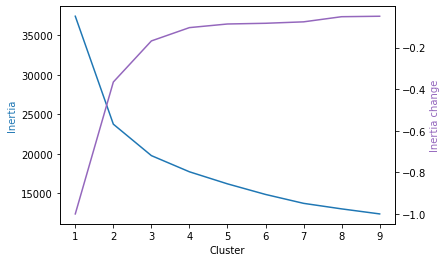

In [36]:
def PCA_boats(alpha_PCA, components_PCA):
    pca=dcp.PCA(n_components=29) 
    pca.fit(new_boat)
    pca_sparse=dcp.SparsePCA(alpha=alpha_PCA,n_components=components_PCA)
    pca_sparse.fit(new_boat)
    data_pca_test = pca_sparse.fit_transform(new_boat)
    column_names = ["C"+str(i+1) for i in range(data_pca_test.shape[1])]
    test_boat=pd.DataFrame(data_pca_test, columns=column_names)
    return test_boat
  
inertia=[]
cluster=list(range(1,10))
test_boat_segments = PCA_boats(10,5)
for k in cluster:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(test_boat_segments)
    inertia.append(kmeanModel.inertia_)

inertia_ch=[-1]
for i in range(len(inertia)-1):
    inertia_ch.append((inertia[i+1]/inertia[i])-1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(cluster, inertia, 'tab:blue')
ax2.plot(cluster, inertia_ch, 'tab:purple')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Inertia', color='tab:blue')
ax2.set_ylabel('Inertia change', color='tab:purple')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4).fit(boat_segments)

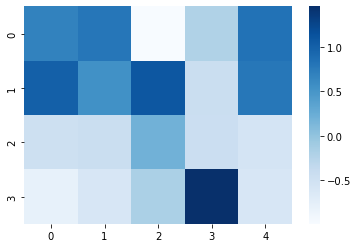

In [38]:
ax=sns.heatmap(kmeans.cluster_centers_, linewidth=0, cmap='Blues')
plt.show()


In [39]:
boat_segments_final=boat_segments
boat_segments_final['segment']=kmeans.labels_
boat_segments_final.insert(0,'RESPID', RESPID_col)
boat_segments_final.to_csv('boat_segments.csv',index=False)
boat_segments_final[['RESPID','segment']].to_csv('boat_segments_vis.csv',index=False)

# 5. Visualisation & Interpretation

In [40]:
visualisation_p5 = pd.read_csv('boat_segments_vis.csv')

In [41]:
questions_2_15 = boat[['Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2',
       'Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']]

scaler = StandardScaler()
questions_2_15_scaled = scaler.fit_transform(questions_2_15.values)
questions_2_15_scaled = pd.DataFrame(questions_2_15_scaled, columns = questions_2_15.columns)
questions_2_15_scaled

df = pd.DataFrame(questions_2_15_scaled)
df = df.set_axis(['Q2', 'Q3', 'Q4',
                 'Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2',
                 'Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15'], axis=1, inplace=False)


/Users/az/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


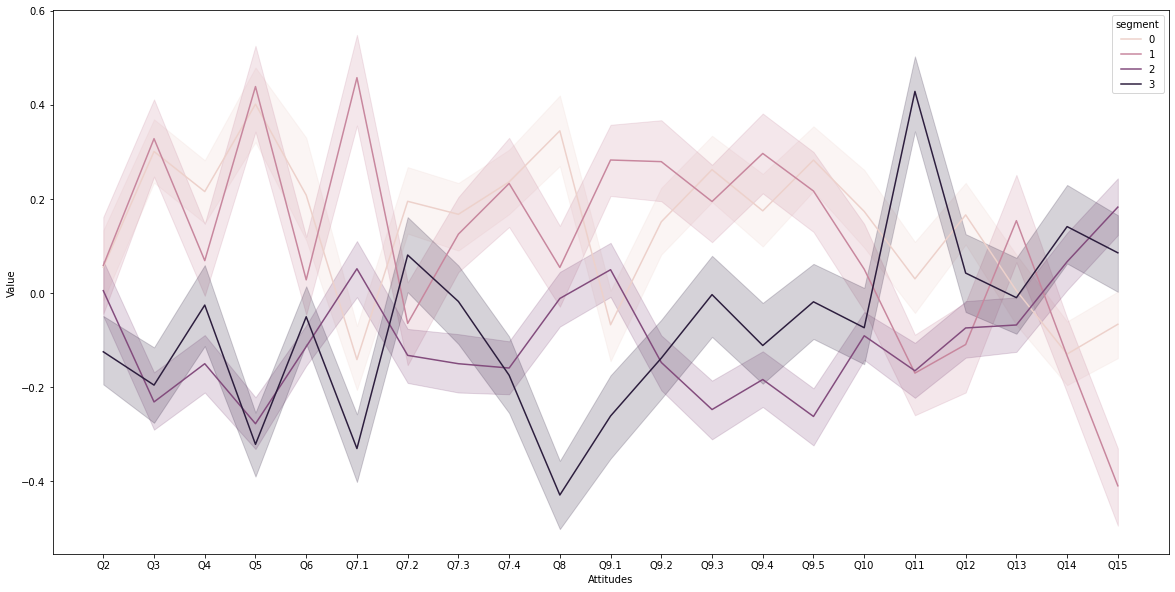

In [42]:
cust_seg = pd.concat([visualisation_p5,df], axis=1, join="inner")

cust_melt = pd.melt(cust_seg.reset_index(),
                    id_vars=['RESPID', 'segment'],
                    value_vars=cust_seg[['Q2', 'Q3', 'Q4',
                                        'Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2',
                                        'Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']],
                    var_name='Attitudes',
                    value_name='Value')
cust_melt
# Snake Plot
fig = plt.figure(figsize=(20, 10))
sns.lineplot('Attitudes', 'Value', hue='segment',data=cust_melt)
plt.show()


In [43]:

cust = pd.concat([visualisation_p5,df], axis=1, join="inner")
cust = cust.drop('RESPID', axis=1)
cust = cust.groupby('segment').mean()
cust.to_csv('cust.csv')



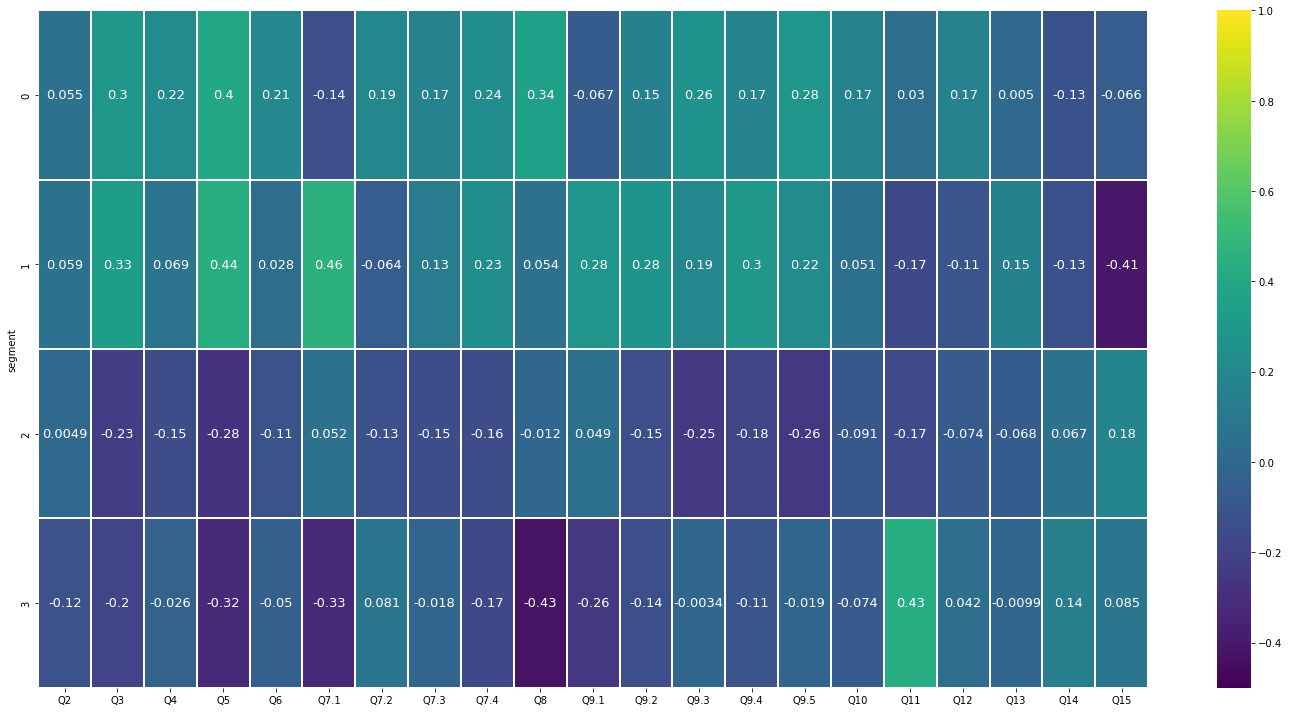

In [44]:
fig = plt.figure(figsize=(20, 10))

sns.heatmap(cust,
            cmap="viridis",  # Choose a squential colormap
            annot=True,  # Label the maximum value
            annot_kws={'fontsize': 13},  # Reduce size of label to fit
            vmax=1,         # Ensure same
            vmin=-0.5,          # color scale
            linewidth=0.1,  # Add gridlines
            linecolor="white",  # Adjust gridline color
            )
fig = plt.tight_layout()
fig = plt.show()

## Decide on cluster descriptions

In [45]:
segments_q2_q15=cust_seg
try:
    del segments_q2_q15['RESPID']
except:
    pass

def find_top_Q(segment):
    top_Qs = pd.DataFrame(segments_q2_q15[segments_q2_q15["segment"]==segment].mean().sort_values().tail(6))
    try:
        top_Qs=top_Qs.drop('segment')[0:5]
    except:
        top_Qs=top_Qs[0:5]
    return top_Qs
    

print("""
\033[1mTop five questions in the segment\033[0m

\033[1mSegment 0\033[0m
{}        

\033[1mSegment 1\033[0m
{}

\033[1mSegment 2\033[0m
{}

\033[1mSegment 3\033[0m 
{}

""".format(find_top_Q(0),
           find_top_Q(1),
           find_top_Q(2),
           find_top_Q(3)
))



Top five questions in the segment

Segment 0
             0
Q7.4  0.235928
Q9.3  0.262017
Q9.5  0.282372
Q3    0.300521
Q8    0.344516        

Segment 1
             0
Q9.1  0.282488
Q9.4  0.296411
Q3    0.327833
Q5    0.438502
Q7.1  0.457375

Segment 2
             0
Q2    0.004944
Q9.1  0.049490
Q7.1  0.051538
Q14   0.066504
Q15   0.182458

Segment 3 
             0
Q12   0.042343
Q7.2  0.080681
Q15   0.085423
Q14   0.141044
Q11   0.428204




### Here we attempt to come up with a description of each segment.

These segments may not directly correspond to the ones above

1. Segement A - "Customers who boat with friends for entertainment":
- they boat with friends
- do cruising
- do Entertaining/Socializing
- will definetely buy new boat in future
- expert in boats

2. Segement B - "Older couples with higher income":
- top household income
- boat with spouse
- age: older
- not working
- female

3. Segement C - "Customers who do fishing and watersports":
- boat for fishing
- boat for watersports
- will definetely buy new boat in future
- higher horse power
- boat with friends

4. Segement D - "Retired customers who boat for fishing, boat fans":
- own several powerboats
- boat for fishing
- boat alone
- not working
- age: older

# 6. Segments for different numbers of components

Discuss how robust your results are to changes in the number of components selected. Make sure to rerun your analysis with at least two different choices of component numbers. There is no need to keep separate code and descriptions of each of these analyses, but you will need to describe how robust your segmentation results are and, if there are major changes when changing the number of components, discuss those.

### Different number of components
If we chose to have 15 componenets in the PCA part (80% variance), we would still go for 2-5 clusters.

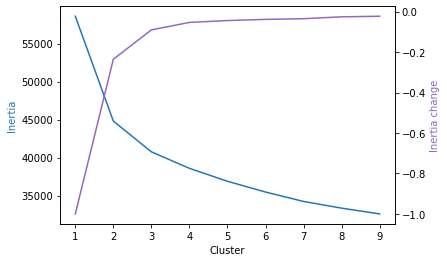

In [46]:
inertia=[]
cluster=list(range(1,10))
test_boat_segments = PCA_boats(10,15)
for k in cluster:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(test_boat_segments)
    inertia.append(kmeanModel.inertia_)

inertia_ch=[-1]
for i in range(len(inertia)-1):
    inertia_ch.append((inertia[i+1]/inertia[i])-1)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(cluster, inertia, 'tab:blue')
ax2.plot(cluster, inertia_ch, 'tab:purple')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Inertia', color='tab:blue')
ax2.set_ylabel('Inertia change', color='tab:purple')
plt.show()

In [47]:

def analyse_components_clusters(component_N,cluster_N):
    
    boat = pd.read_csv('Data_boats.csv')
    new_boat = boat[['Q1.1', 'Q1.2', 'Q1.3', 'Q1.4', 'Q1.5', 'Q1.6', 'Q1.7', 'Q1.8', 'Q1.9', 'Q1.10', 'Q1.11', 'Q1.12', 'Q1.13', 'Q1.14', 'Q1.15', 'Q1.16', 'Q1.17', 'Q1.18', 'Q1.19', 'Q1.20', 'Q1.21', 'Q1.22', 'Q1.23', 'Q1.24', 'Q1.25', 'Q1.26', 'Q1.27', 'Q1.28', 'Q1.29']]
    new_boat=pd.DataFrame(preprocessing.scale(new_boat), columns=new_boat.columns)

    pca=dcp.PCA(n_components=29) 
    pca.fit(new_boat)

    pca_sparse=dcp.SparsePCA(alpha=10,n_components=component_N)
    pca_sparse.fit(new_boat)
    loadings_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,30))
#     loadings_sparse.columns = ['C1','C2', 'C3', 'C4', 'C5']
    loadings_sparse.index = new_boat.columns

    data_pca = pca.fit_transform(new_boat)
    data_pca = pca_sparse.fit_transform(new_boat)
    column_names = ["C"+str(i+1) for i in range(data_pca.shape[1])]
    final_boat=pd.DataFrame(data_pca, columns=column_names)

    first_column = boat.pop('RESPID')
    final_boat.insert(0,'RESPID', first_column)
    final_boat.to_csv('finalboat.csv',index=False)

    boat_segments=final_boat

    # boat_segments = final_boat
#     boat_segments = pd.read_csv('finalboat.csv')
    boat = pd.read_csv('Data_boats.csv')

    RESPID_col = boat_segments.pop('RESPID')
    boat_segments = pd.DataFrame(preprocessing.scale(boat_segments), columns=boat_segments.columns)
    # boat_segments.insert(0,'RESPID', RESPID_col)

    kmeans = KMeans(n_clusters=cluster_N).fit(boat_segments)

    # boat_segments=boat_segments
    boat_segments['segment']=kmeans.labels_
    boat_segments.insert(0,'RESPID', RESPID_col)
    # boat_segments[['RESPID','segment']].to_csv('boat_segments_vis.csv',index=False)

    # boat_segments = pd.read_csv('boat_segments_vis.csv')

    questions_2_15 = boat[['Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2','Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']]

    scaler = StandardScaler()
    questions_2_15_scaled = scaler.fit_transform(questions_2_15.values)
    questions_2_15_scaled = pd.DataFrame(questions_2_15_scaled, columns = questions_2_15.columns)
    # questions_2_15_scaled

    df = pd.DataFrame(questions_2_15_scaled)
    df = df.set_axis(['Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2','Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15'], axis=1, inplace=False)

    cust_seg = pd.concat([boat_segments,df], axis=1, join="inner")

    cust_melt = pd.melt(cust_seg.reset_index(),
                        id_vars=['RESPID', 'segment'],
                        value_vars=cust_seg[['Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']],
                        var_name='Attitudes',
                        value_name='Value')
    cust_melt
    # Snake Plot
    fig1 = plt.figure(figsize=(20, 10))
    sns.lineplot('Attitudes', 'Value', hue='segment',data=cust_melt)
    fig1 = plt.show()
#     fig1.savefig('plot.png')

    return fig1



If you compare the analysis with 15 components and 5 components below, you can see that the results are not that different, but we would still prefer to go with 5 components, because the whole point of PCA is in boiling them down to a comprehesable number.

/Users/az/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


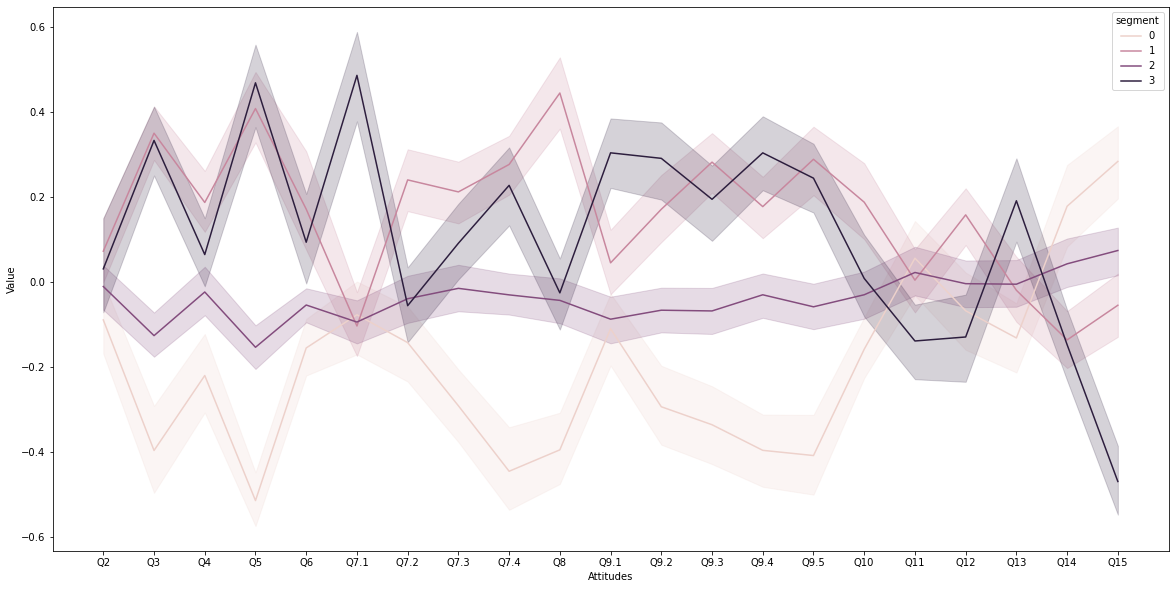

/Users/az/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


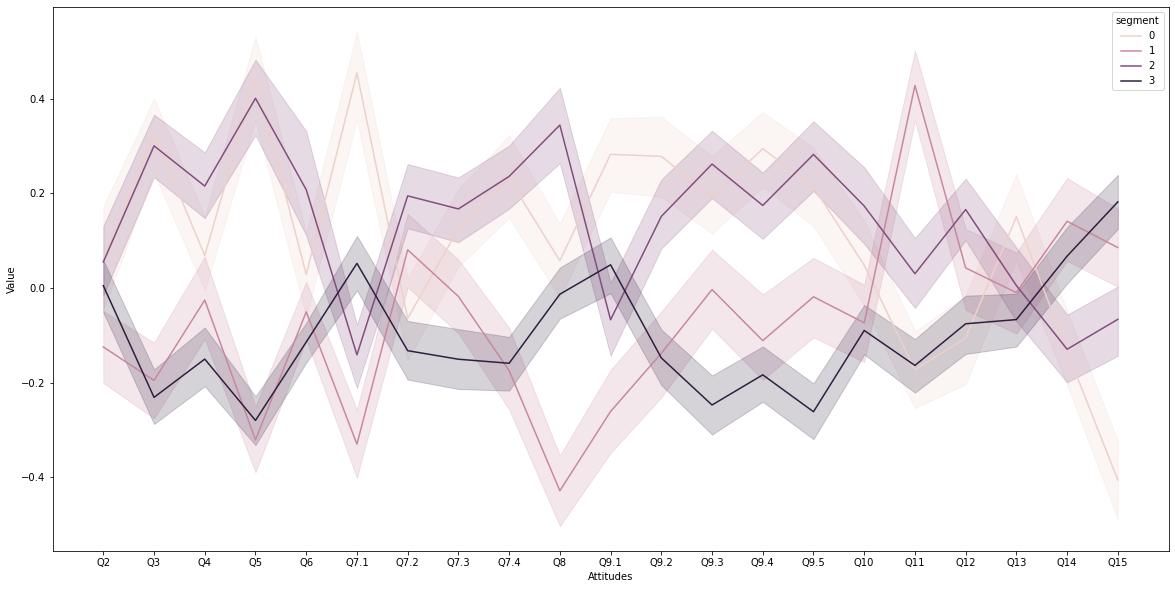

(None, None)

In [48]:
analyse_components_clusters(15,4),analyse_components_clusters(5,4)

### First we define a function to help plot the data with an updated number of clusters

In [49]:
def analyse_clusters(cluster_N):
    # boat_segments = final_boat
    boat_segments = pd.read_csv('finalboat.csv')
    boat = pd.read_csv('Data_boats.csv')

    RESPID_col = boat_segments.pop('RESPID')
    boat_segments = pd.DataFrame(preprocessing.scale(boat_segments), columns=boat_segments.columns)
    # boat_segments.insert(0,'RESPID', RESPID_col)

    kmeans = KMeans(n_clusters=cluster_N).fit(boat_segments)

    # boat_segments=boat_segments
    boat_segments['segment']=kmeans.labels_
    boat_segments.insert(0,'RESPID', RESPID_col)
    # boat_segments[['RESPID','segment']].to_csv('boat_segments_vis.csv',index=False)

    # boat_segments = pd.read_csv('boat_segments_vis.csv')

    questions_2_15 = boat[['Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2','Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']]

    scaler = StandardScaler()
    questions_2_15_scaled = scaler.fit_transform(questions_2_15.values)
    questions_2_15_scaled = pd.DataFrame(questions_2_15_scaled, columns = questions_2_15.columns)
    # questions_2_15_scaled

    df = pd.DataFrame(questions_2_15_scaled)
    df = df.set_axis(['Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2','Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15'], axis=1, inplace=False)

    cust_seg = pd.concat([boat_segments,df], axis=1, join="inner")

    cust_melt = pd.melt(cust_seg.reset_index(),
                        id_vars=['RESPID', 'segment'],
                        value_vars=cust_seg[['Q2', 'Q3', 'Q4','Q5', 'Q6', 'Q7.1', 'Q7.2', 'Q7.3', 'Q7.4', 'Q8', 'Q9.1', 'Q9.2', 'Q9.3', 'Q9.4', 'Q9.5', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']],
                        var_name='Attitudes',
                        value_name='Value')
    cust_melt
    # Snake Plot
    fig1 = plt.figure(figsize=(20, 10))
    sns.lineplot('Attitudes', 'Value', hue='segment',data=cust_melt)
    fig1 = plt.show()
#     fig1.savefig('plot.png')

    return fig1


If we try a very low number of clusters, like 2, this will just create two clusters with the opposite opinions, while making clusters not specific enough and too general.

/Users/az/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


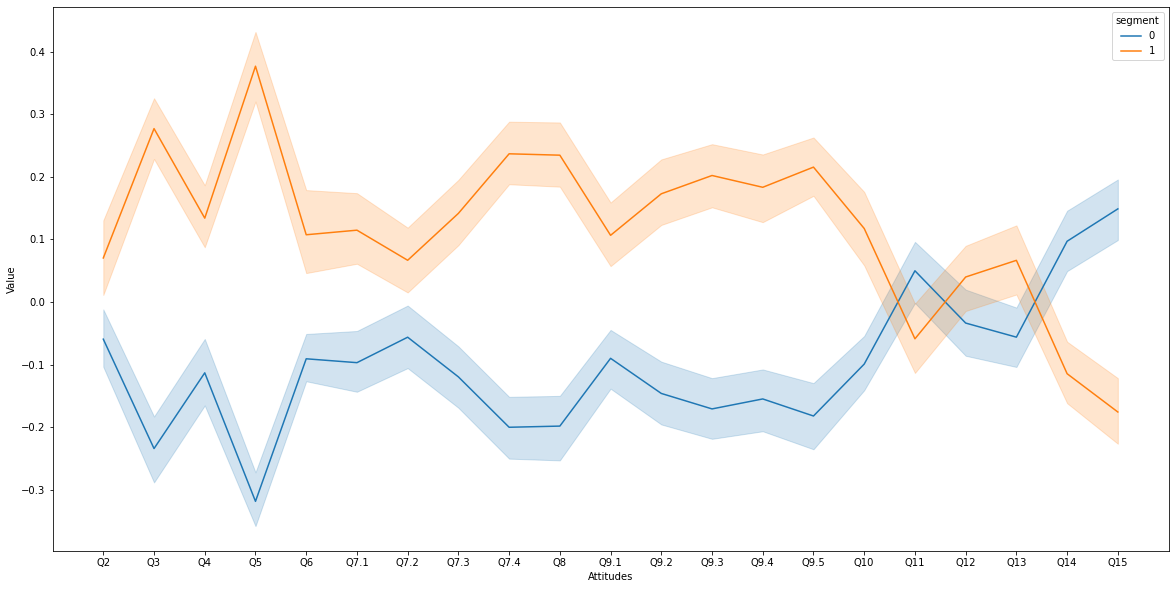

In [50]:
analyse_clusters(2)

At the same time, adding more clusters to the analysis will just complicate the matter and create too many (sometimes quite similar) segments, which will not be benefitial for the boat manufacturer. We can also see that the room for error has increased as each pipeline became broader. 

/Users/az/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


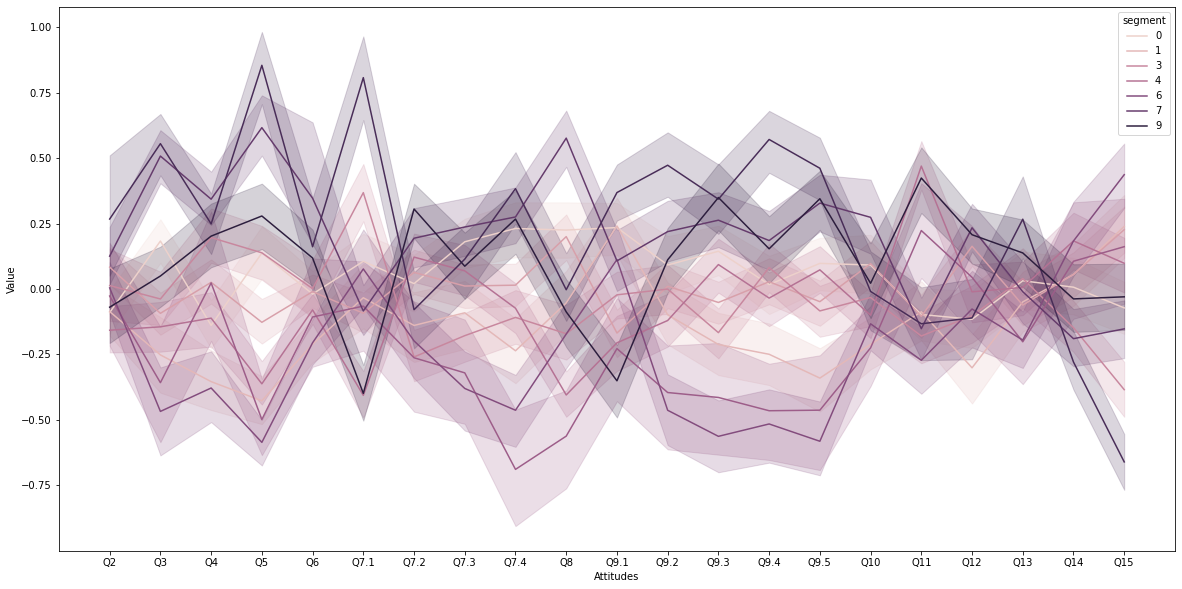

In [51]:
analyse_clusters(10)

Passing through 4,5,and 6 number of clusters as an argument, we can see a much clearer picture, which is at the same time not too simplistic.

As we mentioned above, we chose 4 clusters because it seemed consistent with the hierarchical dendrogram as well as provided one of the best trade-offs between number of components and inertia.

/Users/az/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


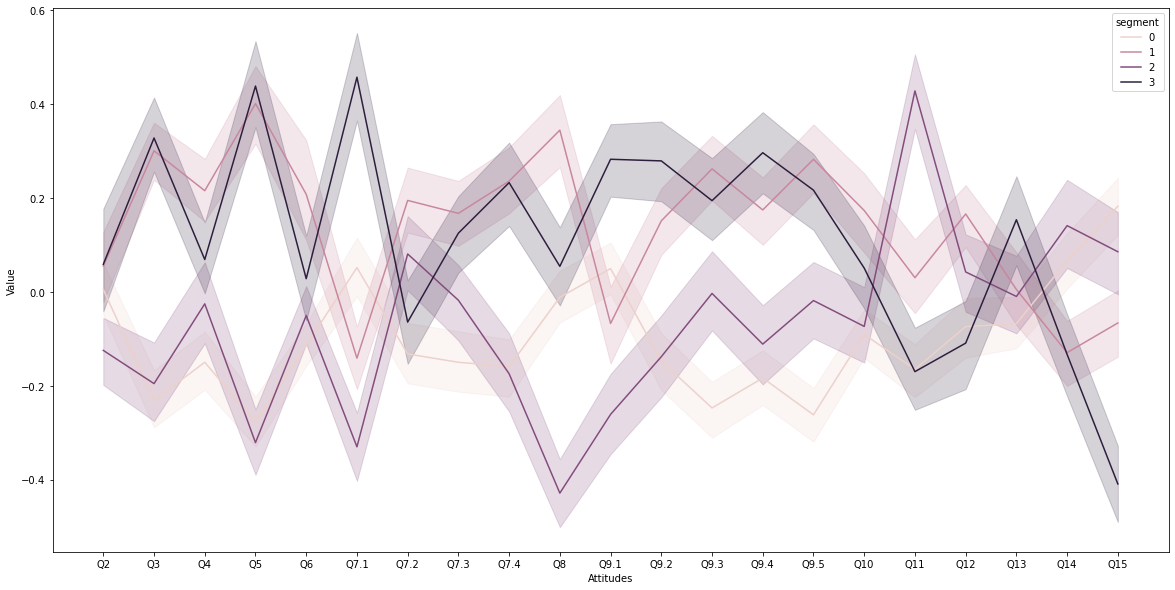

/Users/az/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


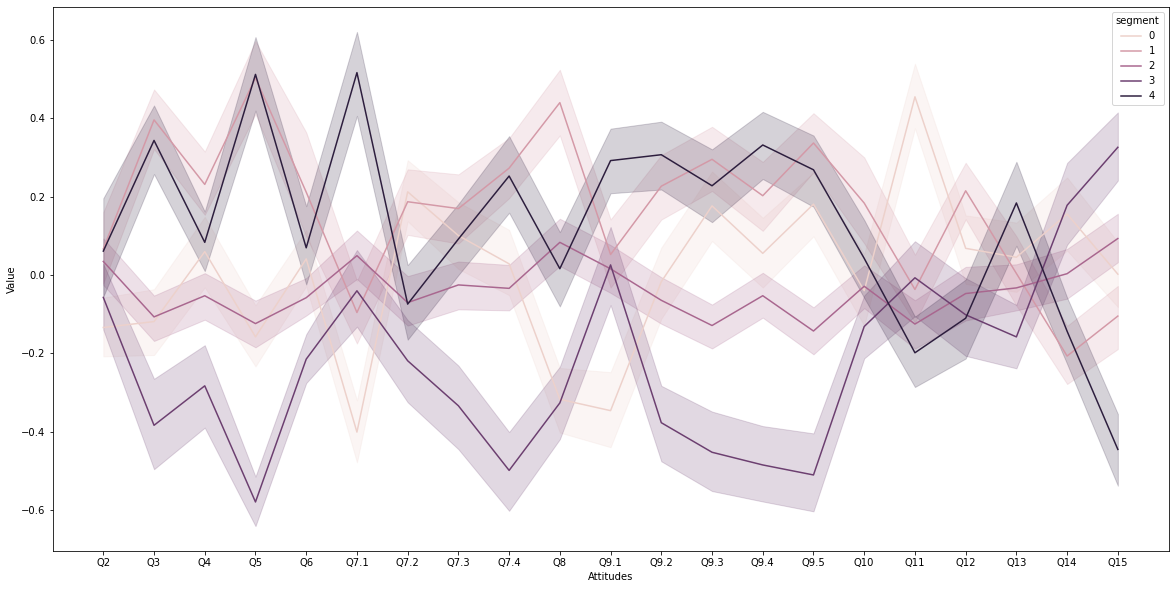

/Users/az/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


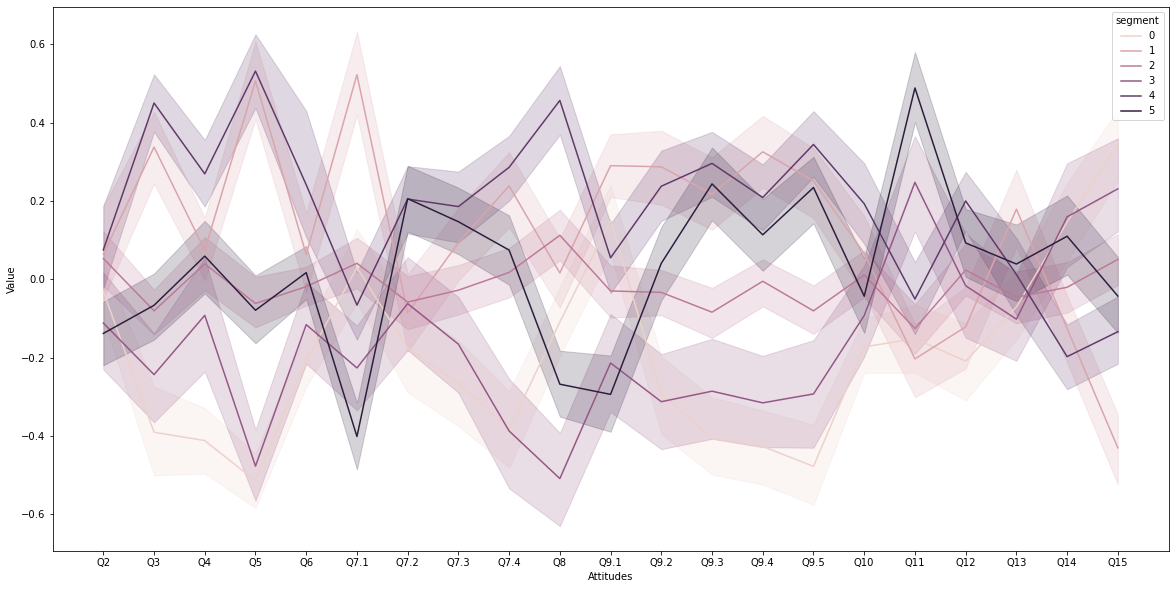

(None, None, None)

In [52]:
analyse_clusters(4),analyse_clusters(5), analyse_clusters(6)

# 7. Recommendation to CreeqBoat

---> we decided to treat Q17 and Q18 as relating to CreeqBoat

From the analysis below we can see that CreeqBoat mostly apeals to the segment A and least appeals to the segment B, as per below.

Segement A - "Customers who boat with friends for entertainment":
- they boat with friends
- do cruising
- do Entertaining/Socializing
- will definetely buy new boat in future
- expert in boats

Segement B - "Older couples with higher income":
- top household income
- boat with spouse
- age: older
- not working
- female

In [53]:
Boats = pd.read_csv('Data_boats.csv')
column = Boats.pop('Q17')
column1 = Boats.pop('Q18')
p7 = visualisation_p5.copy()
p7['Q17'] = column
p7['Q18'] = column1
p7['sum'] =p7['Q17']+p7['Q18']


a=p7.loc[p7.segment== 0,'segment'].count()
b=p7.loc[p7.segment == 1, 'segment'].count()
c=p7.loc[p7.segment == 2, 'segment'].count()
d=p7.loc[p7.segment == 3, 'segment'].count()

p7["customers"] = p7["segment"]
p7["customers"] = p7["customers"].replace({0: a, 1: b, 2: c, 3: d})
p7.head()

p7 = p7.drop('RESPID', axis=1)
bubble = p7.groupby('segment').mean()
bubble

import plotly.express as px
fig = px.scatter(bubble, x=bubble.index, y="sum",
                 size="customers")
fig.show()